In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting capaccity and fuel.

In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With the above we can see last 5 rows of our dataset, by which we can see that which factor is affecting capaccity and fuel.

In [5]:
df.shape

(907, 27)

By the above function we can see that we are having 907 rows and 27 columns in our dataset.

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Here we can see that most of our columns are having float datatype and object datatype and we need to change it to integer type so that it can work with our machine learning model

In [9]:
#let's quickly check null values now as we have seen many in tail function.
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

As we can see we have too much null valuyes in our data which needs to be treated, some of columns are having all the values as null, so let's drop them first, as they would not be helpful for us in prediction

In [31]:
df.drop(columns=['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel3',], inplace=True)

KeyError: "['estimated_generation_gwh', 'generation_gwh_2019', 'generation_gwh_2013', 'wepp_id', 'other_fuel3'] not found in axis"

In [ ]:
As we already dropped this column it is howing error, let's drop two more columns.

In [33]:
df.drop(columns=['other_fuel1','other_fuel2'],inplace=True)

In [34]:
df.shape

(907, 20)

We can see we've dropped 7 columns from our data which are having all values as null, now let's trest other null values.

In [29]:
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mean(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

In [35]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [ ]:
We can see that we have successfully removed null values from our numeric columns let us now treat object columns, before that let's change them into integer type.

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [115]:
df['owner'] = LabelEncoder().fit_transform(df['owner'])
df['geolocation_source'] = LabelEncoder().fit_transform(df['geolocation_source'])
df['generation_data_source'] = LabelEncoder().fit_transform(df['generation_data_source'])
df['name'] = LabelEncoder().fit_transform(df['name'])
df['source'] = LabelEncoder().fit_transform(df['source'])
df['gppd_idnr'] = LabelEncoder().fit_transform(df['gppd_idnr'])
df['primary_fuel'] = LabelEncoder().fit_transform(df['primary_fuel'])

In [116]:
df.dtypes

name                        int64
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
commissioning_year        float64
owner                       int64
source                      int64
geolocation_source          int64
generation_gwh_2018       float64
generation_data_source      int64
dtype: object

In [41]:
df['owner'].fillna(df['owner'].mean(), inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mean(), inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].mean(), inplace=True)

In [42]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Perfect! we have treated all the null values and now we can proceed further.

<Axes: >

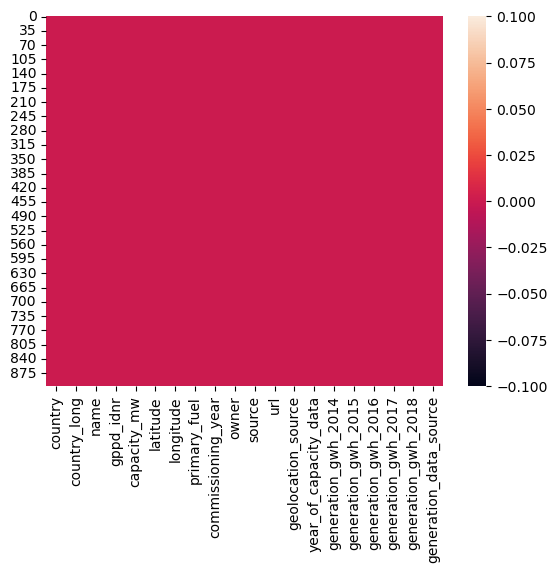

In [43]:
#let's also check heatmap of null values after treatment
sns.heatmap(df.isnull())

We can see that colour of heatmap is completely near 0 this means we are not having any null values as we seen above.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   commissioning_year      907 non-null    float64
 9   owner                   907 non-null    int64  
 10  source                  907 non-null    object 
 11  url                     907 non-null    object 
 12  geolocation_source      907 non-null    int32  
 13  year_of_capacity_data   907 non-null    float64
 14  generation_gwh_2014     907 non-null    fl

We can see now we have successfully sorted all the the columns it's datatypes and null values present in our data, now let's analys it further.

In [47]:
#Let's check unique values in our data
df.nunique().to_frame("Unique values")

,Unique values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,837
longitude,828
primary_fuel,8
commissioning_year,74
owner,281


In [ ]:
We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

Also as country, year_of_capacity_data, and country_long are having single unique values, let's drop this columns as these would not be helpful for analysis and prediction.

In [51]:
df.drop(columns=['year_of_capacity_data','country_long','country'], inplace=True)

In [52]:
df.duplicated().sum()

0

By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we do not have to lose more data, which we've alrteady lost to remove null values.

In [53]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,227.476295,1.754135,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,590.085456,6.079148,4.812291,13.016360,83.924045,0.700183,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.500251
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,188.500000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,0.000000
50%,59.200000,21.281800,76.979200,1997.091082,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,385.250000,25.176450,79.206100,2003.000000,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,4760.000000,34.649000,95.408000,2018.000000,280.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


Let's check correlation between different columns.

In [54]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,1.000000,0.050984,0.195882,0.274292,3.043221e-01,1.834187e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-4.958331e-01
latitude,0.050984,1.000000,0.036362,0.102069,7.220683e-03,-1.782135e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,-8.690977e-02
longitude,0.195882,0.036362,1.000000,0.092331,2.784428e-01,2.440420e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,-4.098033e-01
commissioning_year,0.274292,0.102069,0.092331,1.000000,-2.137372e-02,6.055371e-04,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01,-9.951977e-02
owner,0.304322,0.007221,0.278443,-0.021374,1.000000e+00,3.982118e-01,-1.660279e-16,-9.981670e-17,-7.338884e-17,-2.581045e-17,-6.497742e-17,-6.200103e-01
geolocation_source,0.183419,-0.178213,0.244042,0.000606,3.982118e-01,1.000000e+00,-1.944368e-16,-1.645132e-16,-8.108279e-17,-1.553816e-16,-1.354090e-16,-3.478693e-01
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,-1.660279e-16,-1.944368e-16,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01,1.411887e-16
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,-9.981670e-17,-1.645132e-16,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01,5.686366e-17
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,-7.338884e-17,-8.108279e-17,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01,9.691668e-17
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,-2.581045e-17,-1.553816e-16,8.916868e-01,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01,1.114454e-16


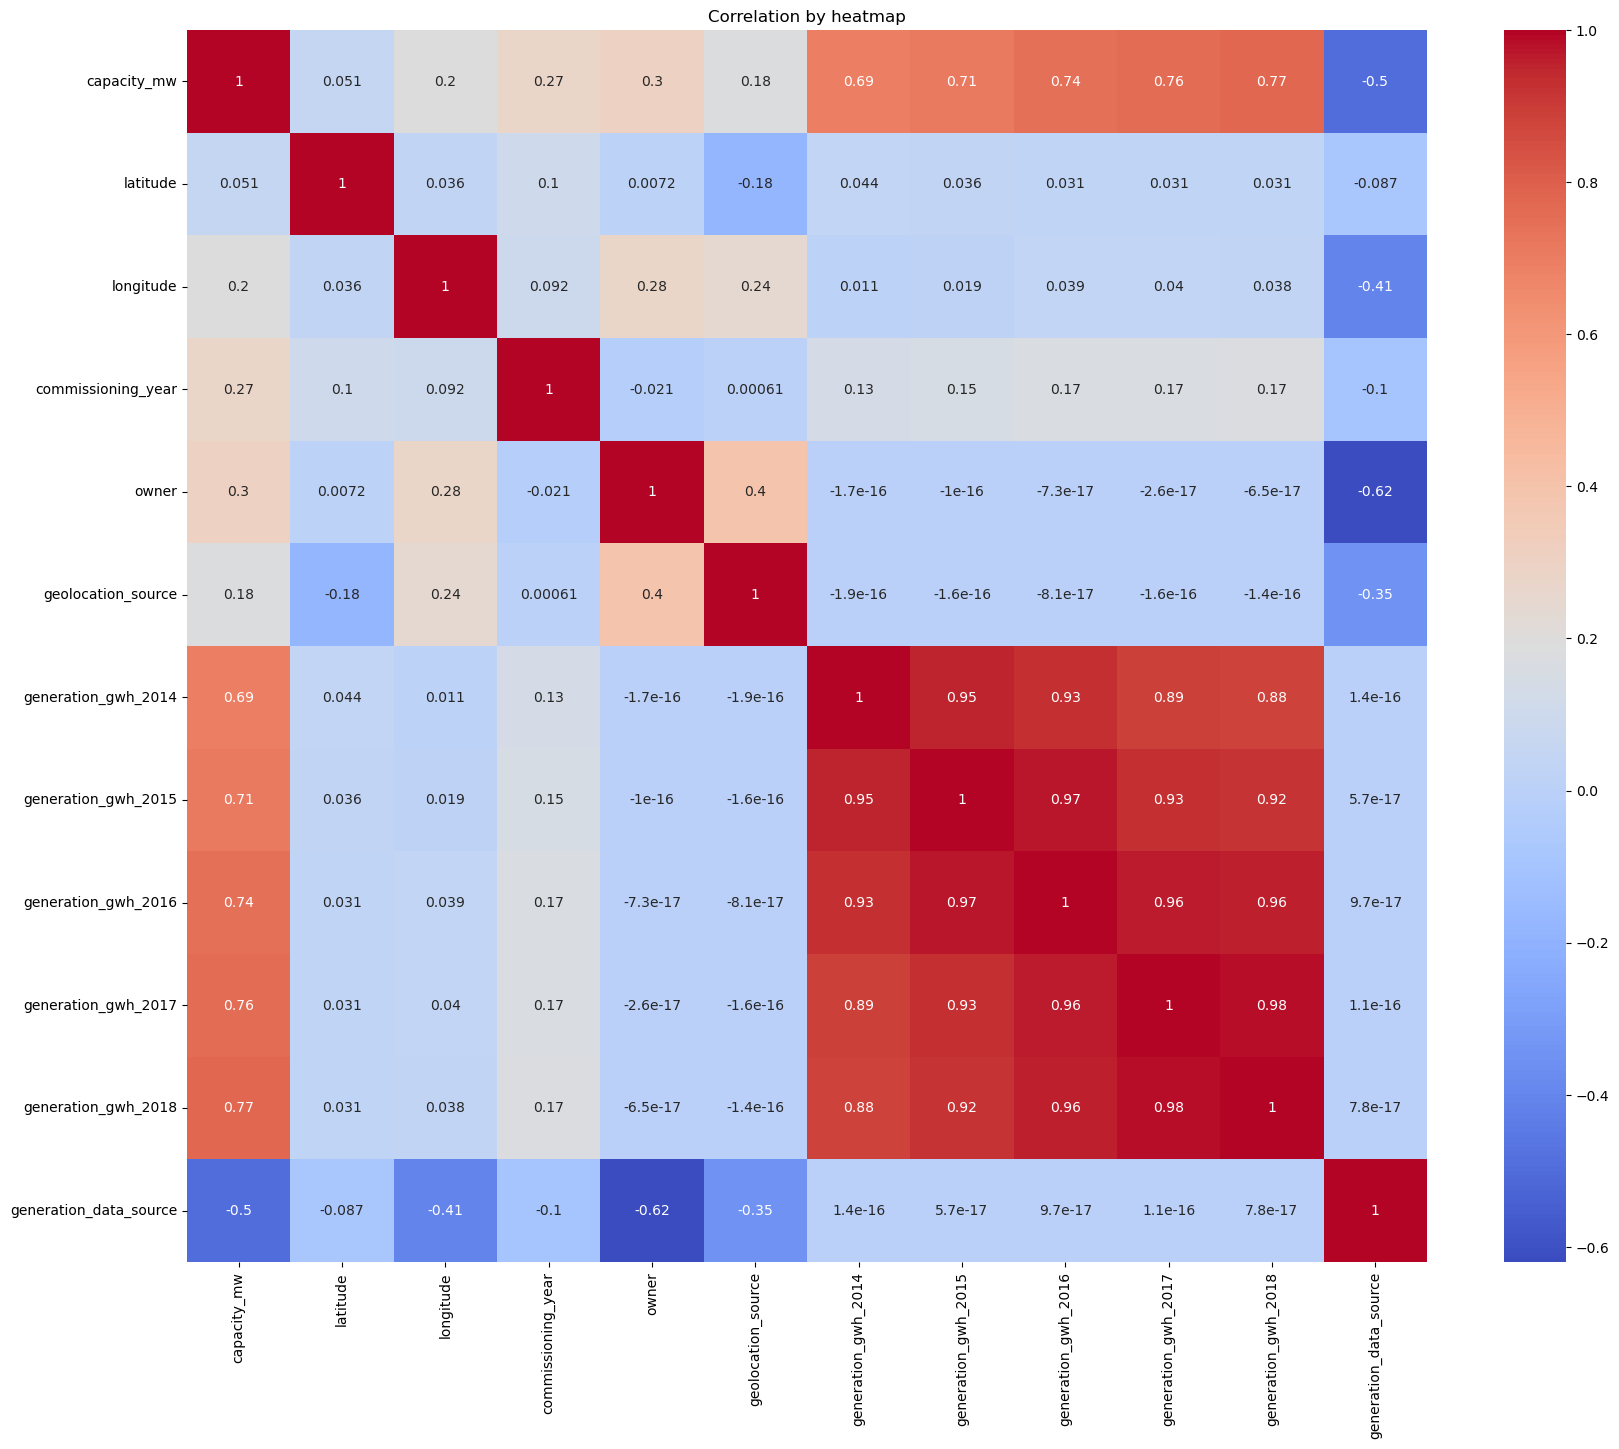

In [55]:
#As it is not easy to understand correlation via above code let's check it by making and correlation matrix(heatmap)
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

We can see that we are having highly correlated columns andf all of them are Generation_gwh for different years si let's try by dropping 3 of them.

In [56]:
df.drop(columns=['generation_gwh_2015','generation_gwh_2016','generation_gwh_2015'], inplace=True)

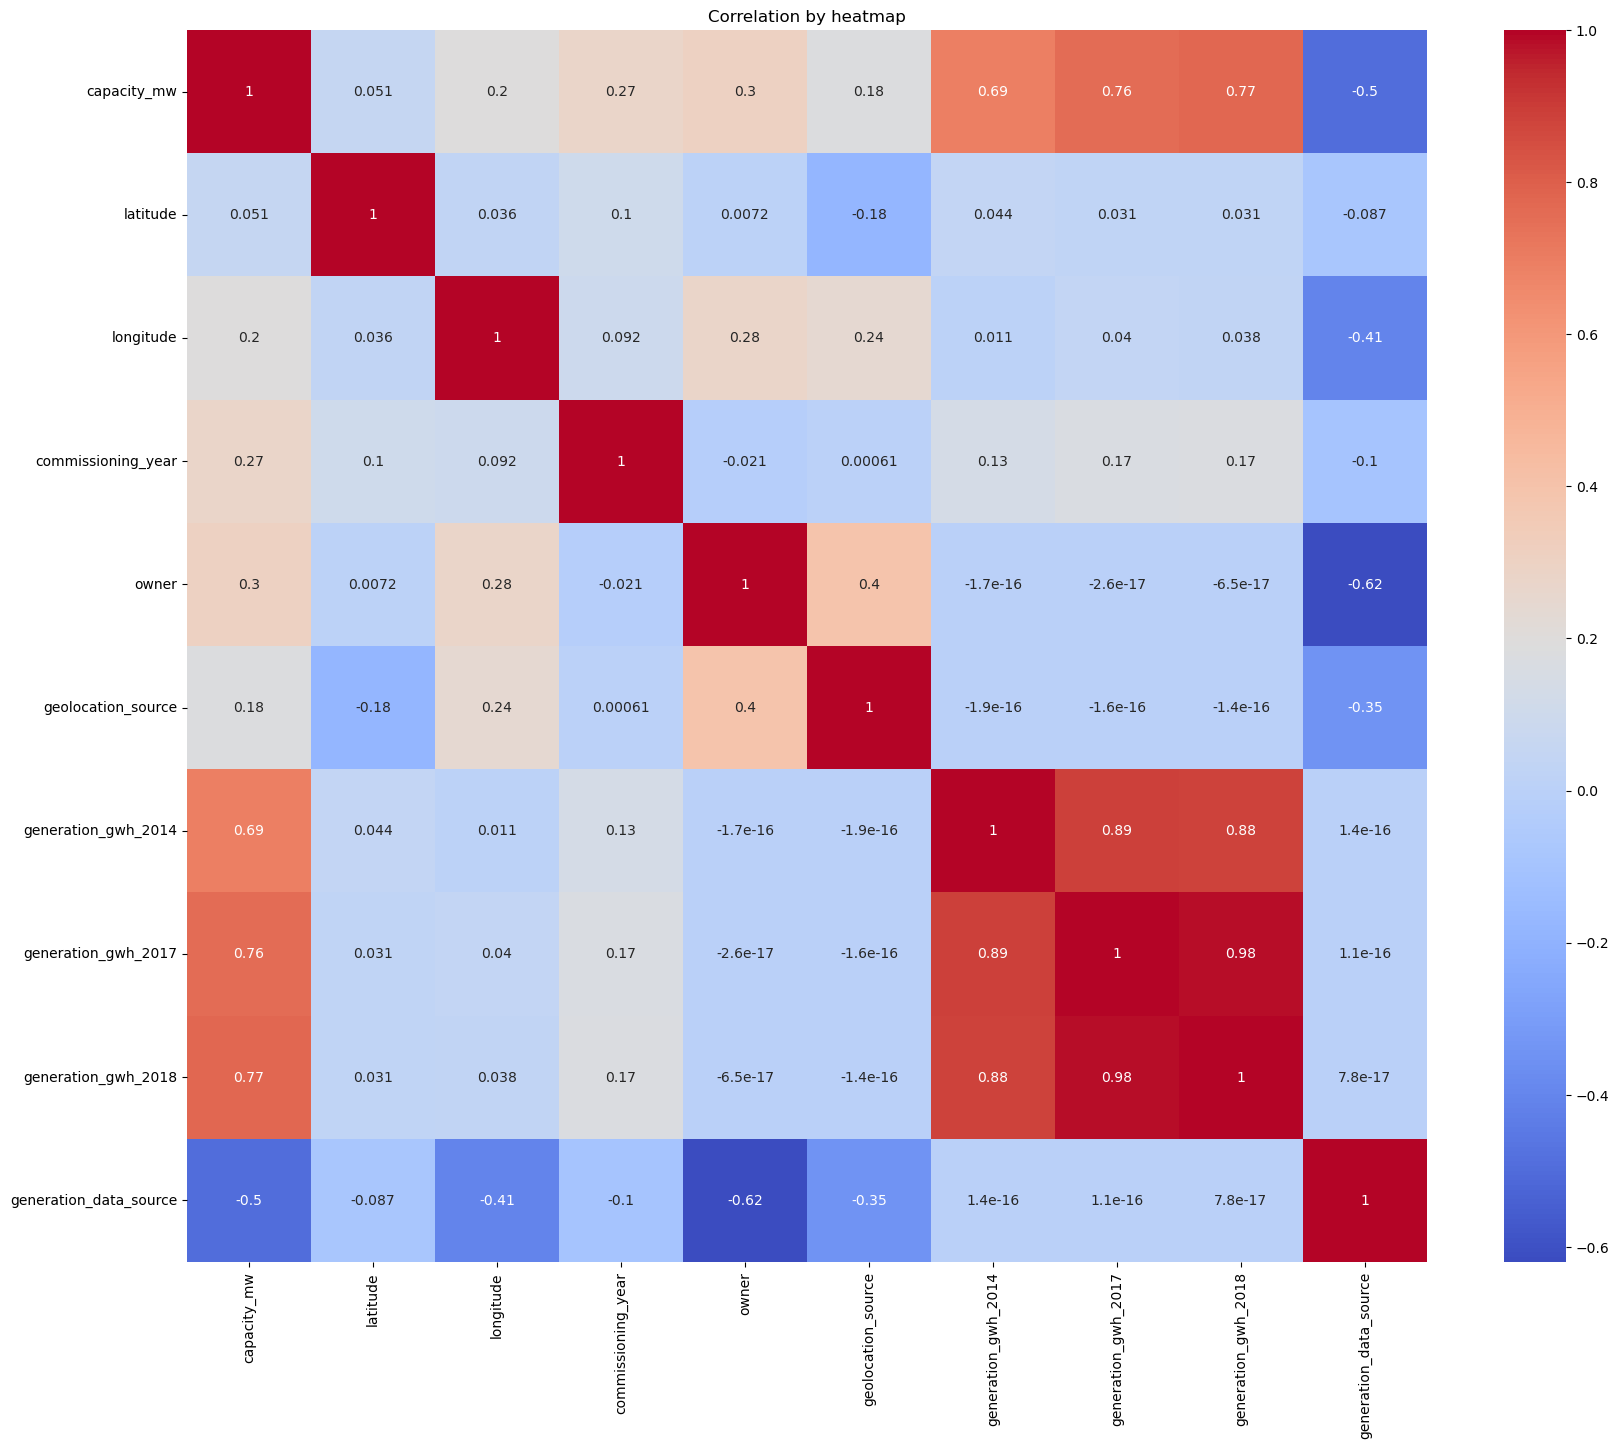

In [57]:
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

In [ ]:
Still we are facing this issue, in this case let's keep only one that is 2018

In [58]:
df.drop(columns=['generation_gwh_2014','generation_gwh_2017'], inplace=True)

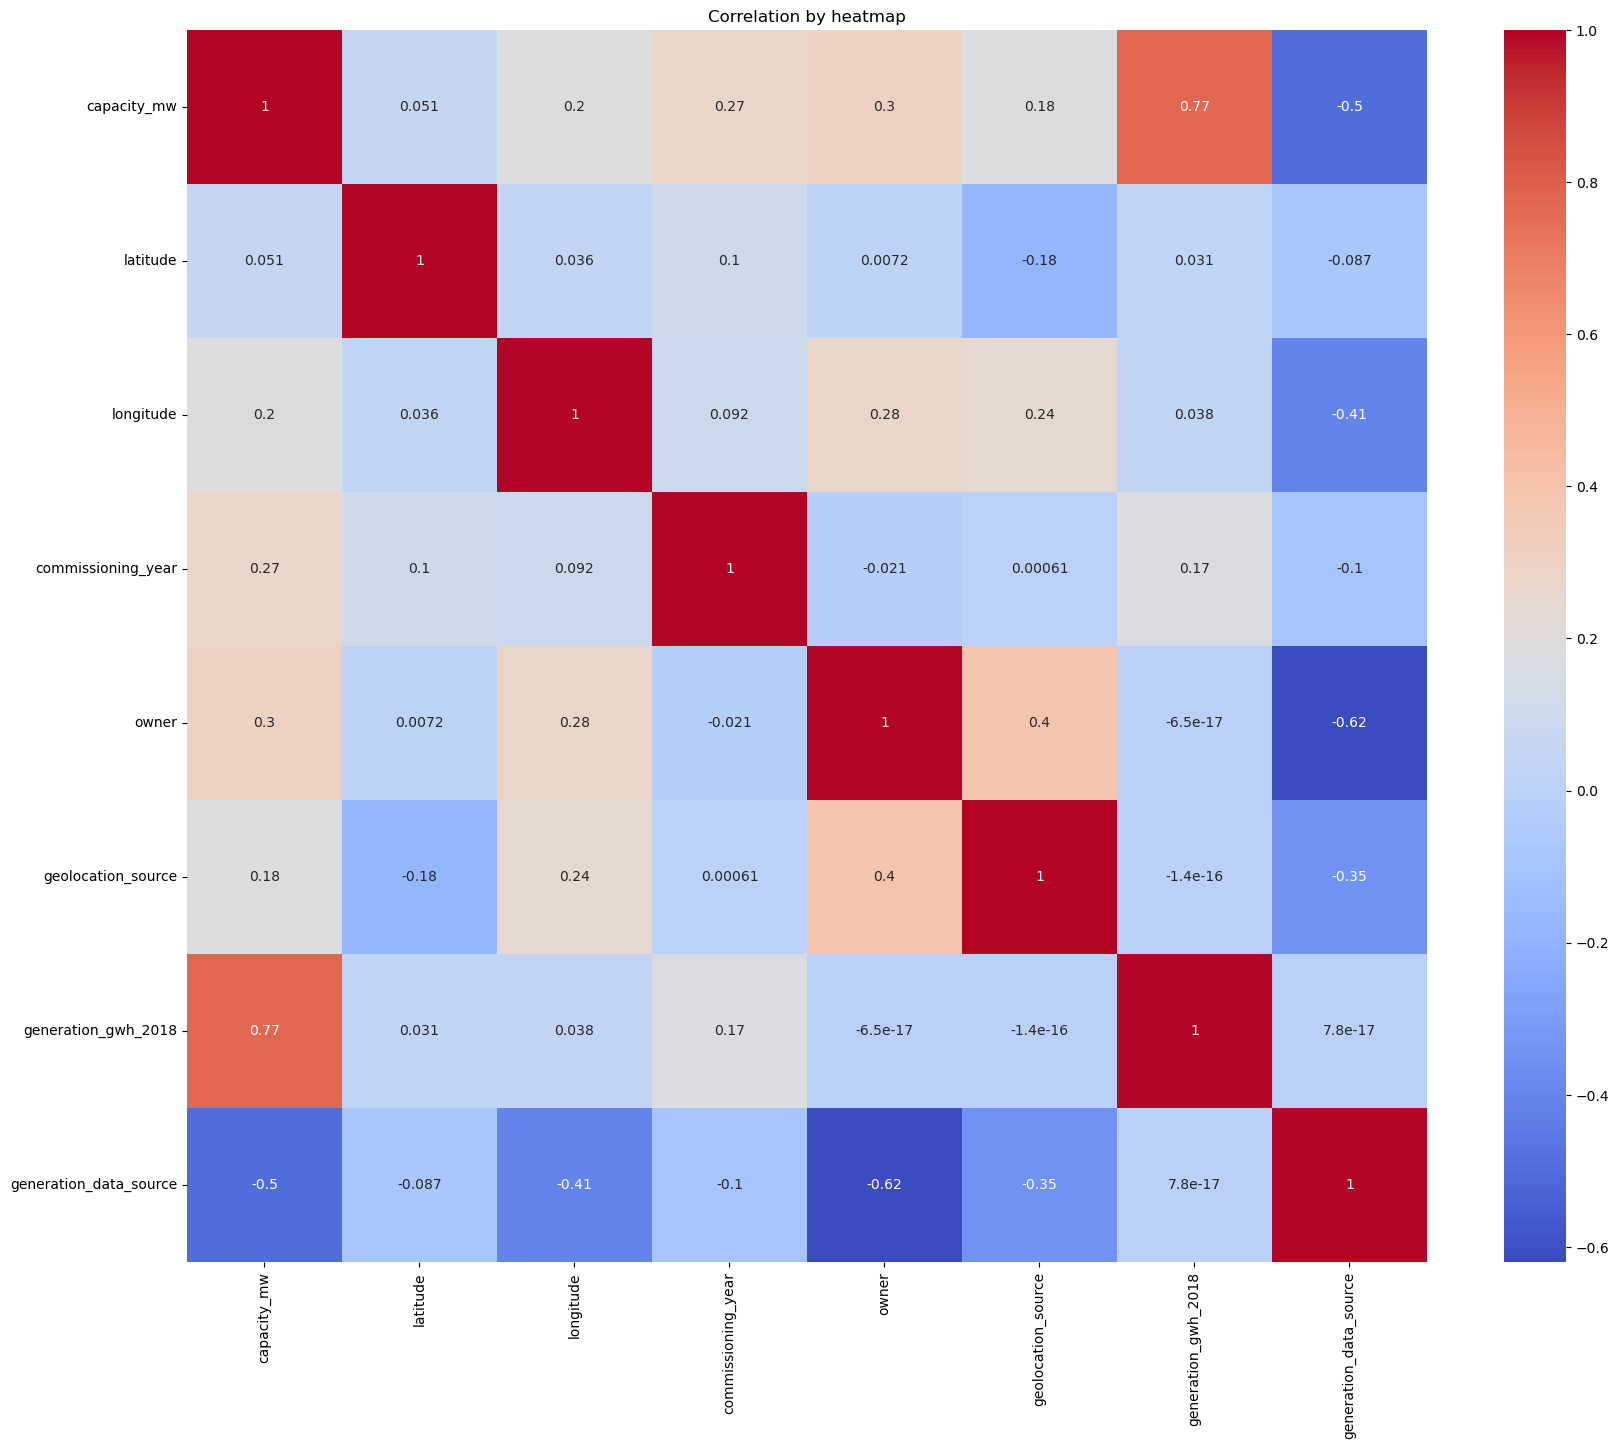

In [59]:
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

And now it's all done and sorted and we do not have to worry about multicollinearity issue.

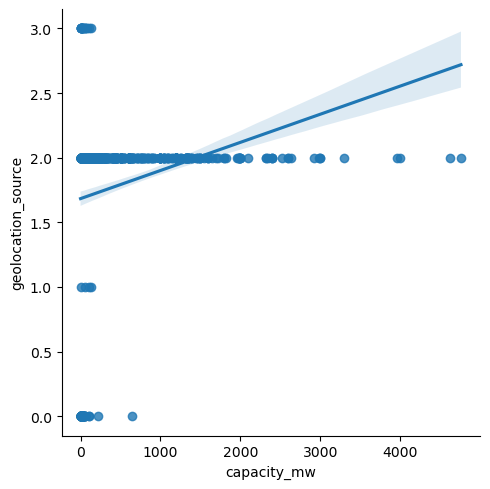

In [61]:
sns.lmplot(x='capacity_mw',y='geolocation_source',data=df,palette='colorblind')

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'capacity_mw'),
  Text(2, 0, 'latitude'),
  Text(3, 0, 'longitude'),
  Text(4, 0, 'commissioning_year'),
  Text(5, 0, 'owner'),
  Text(6, 0, 'geolocation_source'),
  Text(7, 0, 'generation_gwh_2018'),
  Text(8, 0, 'generation_data_source')])

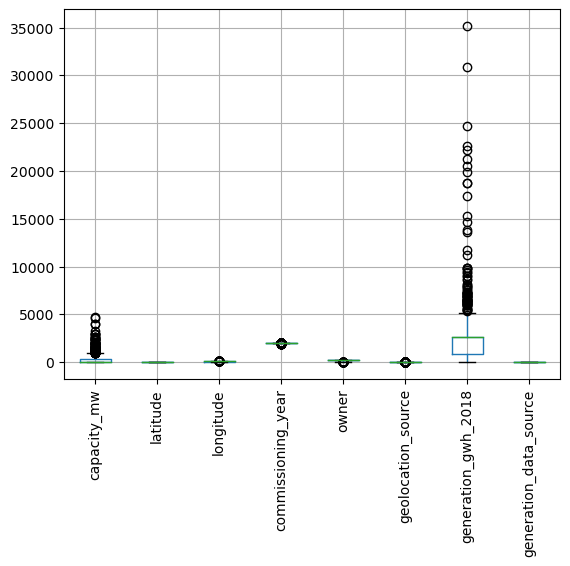

In [62]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

With the help of above plot we can see that we may be having outliers in generation_gwh_2018 columns let's check it further.

In [117]:
#Let's find outlier with Zscore method
outliers=df[['generation_gwh_2018']]
z=np.abs(zscore(outliers))
z

,generation_gwh_2018
0,1.501244e-16
1,1.501244e-16
2,1.501244e-16
3,6.518573e-01
4,1.544399e+00
...,...
902,6.319636e-01
903,1.501244e-16
904,1.501244e-16
905,1.501244e-16


In [118]:
np.where(z>3)

(array([ 15, 143, 209, 308, 364, 493, 494, 648, 657, 695, 721, 724, 726,
        786, 808, 880], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

Here we go- we've successfully detected outliers here let's removed them in next step

In [119]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [120]:
df1.shape

(891, 12)

we can see earlier we were having more than 1500 rows however after removing outliers we are only having 900 rows that means we have successfuly removed unneccesaary data and now we can proceed further with building model as we are done with data preprocessing.

In [121]:
#now let's also check skewnesss in our data
df1.skew()

name                      0.010992
gppd_idnr                -0.018227
capacity_mw               2.216153
latitude                 -0.138749
longitude                 1.199048
primary_fuel              0.444221
commissioning_year       -1.394961
owner                    -1.347054
source                    1.798822
geolocation_source       -1.891641
generation_gwh_2018       1.456303
generation_data_source   -0.056234
dtype: float64

In [122]:
#Let's use cuberoot method to remove skewness
df1['longitude']=np.cbrt(df1['longitude'])
df1['capacity_mw']=np.cbrt(df1['capacity_mw'])
df1['generation_gwh_2018']=np.cbrt(df1['generation_gwh_2018'])

In [123]:
df1.skew()

name                      0.010992
gppd_idnr                -0.018227
capacity_mw               0.896550
latitude                 -0.138749
longitude                 1.056912
primary_fuel              0.444221
commissioning_year       -1.394961
owner                    -1.347054
source                    1.798822
geolocation_source       -1.891641
generation_gwh_2018      -0.945458
generation_data_source   -0.056234
dtype: float64

As URL will also not play any role in prediction let's remove it.

In [124]:
df1.drop(columns=['url'],inplace=True)

KeyError: "['url'] not found in axis"

# As now our data is ready to work let's divide it into dependent and target variable first we are building an model for Primary fuel that is a classification model 

In [125]:
features = ['gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'commissioning_year', 'owner', 'geolocation_source','generation_gwh_2018', 'generation_data_source']
target = 'primary_fuel'

In [126]:
x = df1[features]
y = df1[target]

In [127]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (891, 9)
dimension of dependent variable: (891,)


We can see that we are having same number of rows that is 891 and 9 columns in indpendent variable wich means we are going good and can perform training and prediction.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [129]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

In [112]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8507462686567164
[[14  1  0  0  0  0  0  0]
 [ 3 61  3  9  0  1  0  0]
 [ 2  3  9  4  0  1  0  0]
 [ 0  3  0 70  0  0  0  0]
 [ 0  3  0  1  0  0  0  1]
 [ 3  0  1  1  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.86      0.79      0.82        77
           2       0.69      0.47      0.56        19
           3       0.82      0.96      0.89        73
           4       0.00      0.00      0.00         5
           5       0.50      0.29      0.36         7
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        40

    accuracy                           0.85       268
   macro avg       0.69      0.68      0.67       268
weighted avg       0.83      0.85      0.84       268



In [131]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8507462686567164
[[14  1  0  0  0  0  0  0]
 [ 5 63  2  6  0  1  0  0]
 [ 1  4  8  5  0  1  0  0]
 [ 0  4  0 69  0  0  0  0]
 [ 0  3  0  1  0  0  0  1]
 [ 2  0  2  1  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.84      0.82      0.83        77
           2       0.67      0.42      0.52        19
           3       0.84      0.95      0.89        73
           4       0.00      0.00      0.00         5
           5       0.50      0.29      0.36         7
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        40

    accuracy                           0.85       268
   macro avg       0.68      0.68      0.67       268
weighted avg       0.83      0.85      0.84       268



In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8619402985074627
[[13  2  0  0  0  0  0  0]
 [ 3 64  2  7  0  1  0  0]
 [ 1  6  9  2  0  1  0  0]
 [ 0  5  0 68  0  0  0  0]
 [ 0  3  0  0  1  1  0  0]
 [ 3  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        15
           1       0.80      0.83      0.82        77
           2       0.82      0.47      0.60        19
           3       0.88      0.93      0.91        73
           4       1.00      0.20      0.33         5
           5       0.57      0.57      0.57         7
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40

    accuracy                           0.86       268
   macro avg       0.84      0.73      0.75       268
weighted avg       0.87      0.86      0.86       268



In [133]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.6007462686567164
[[ 0 15  0  0  0  0  0  0]
 [ 0 63  0 14  0  0  0  0]
 [ 0  8  0 11  0  0  0  0]
 [ 0  7  0 66  0  0  0  0]
 [ 0  3  0  1  0  0  1  0]
 [ 0  4  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 40  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.63      0.82      0.71        77
           2       0.00      0.00      0.00        19
           3       0.69      0.90      0.79        73
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.44      1.00      0.61        32
           7       0.00      0.00      0.00        40

    accuracy                           0.60       268
   macro avg       0.22      0.34      0.26       268
weighted avg       0.42      0.60      0.49       268



In [134]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8246268656716418
[[11  4  0  0  0  0  0  0]
 [ 3 61  3  8  0  2  0  0]
 [ 0  8  6  4  0  1  0  0]
 [ 1  3  0 69  0  0  0  0]
 [ 0  3  0  1  0  0  0  1]
 [ 1  4  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.73      0.79      0.76        77
           2       0.67      0.32      0.43        19
           3       0.84      0.95      0.89        73
           4       0.00      0.00      0.00         5
           5       0.40      0.29      0.33         7
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        40

    accuracy                           0.82       268
   macro avg       0.66      0.63      0.64       268
weighted avg       0.80      0.82      0.81       268



Above we have used many models which are providing different accuracy to finalize our model let's check using cross validation and hypothesis testing.

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[0.8547486  0.87640449 0.91011236 0.83707865 0.85955056]
0.867578934153537
Difference between Accuracy score and cross validation score is : -85.90714714669699


In [137]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.84357542 0.86516854 0.89325843 0.82022472 0.87640449]
0.8597263197539389
Difference between Accuracy score and cross validation score is : -85.12188570673716


In [138]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.60893855 0.56741573 0.53932584 0.41573034 0.57865169]
0.5420124285983303
Difference between Accuracy score and cross validation score is : -53.60049659117632


In [139]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.80446927 0.84269663 0.88764045 0.83707865 0.84269663]
0.8429163266587156
Difference between Accuracy score and cross validation score is : -83.46700580019991


Let's do Hyper parameter tunning via Randomized search

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
parameters={'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

In [144]:
RSV=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=5)

In [145]:
RSV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [146]:
RSV.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': None}

In [147]:
Model=ExtraTreesClassifier(n_estimators= 200,min_samples_split= 10,min_samples_leaf= 2,max_features= 'auto',max_depth= 20, criterion = 'entropy',class_weight= None)

In [148]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.832089552238806
[[14  1  0  0  0  0  0  0]
 [ 3 64  2  7  0  1  0  0]
 [ 2  4  4  8  0  1  0  0]
 [ 0  5  0 68  0  0  0  0]
 [ 0  3  0  1  0  0  0  1]
 [ 4  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.83      0.83      0.83        77
           2       0.67      0.21      0.32        19
           3       0.79      0.93      0.86        73
           4       0.00      0.00      0.00         5
           5       0.33      0.14      0.20         7
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        40

    accuracy                           0.83       268
   macro avg       0.65      0.63      0.62       268
weighted avg       0.81      0.83      0.81       268



We can see that at the final stage ur model is giving accuracy score of 83 which can be considered as excellent accuracy score.

# Now let's build regression model for prediction of capacity_mw.

In [149]:
features = ['gppd_idnr', 'primary_fuel', 'latitude', 'longitude',
       'commissioning_year', 'owner', 'geolocation_source','generation_gwh_2018', 'generation_data_source']
target = 'capacity_mw'

In [150]:
x = df1[features]
y = df1[target]

In [151]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (891, 9)
dimension of dependent variable: (891,)


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [153]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

Now we'll check different models so that we can understand which model would be more efficient for us.

In [154]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.6971657346743797
R2 score on training Data: 100.0
Mean Absolute Error: 1.1836818856214435
Mean Squared Error: 2.974270277757272
Root Mean Squared Error: 1.7246072821826053


In [155]:
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred_RFR=rfr.predict (x_test)
    pred_train=rfr.predict(x_train)
    print ('R2 score:',r2_score(y_test,pred_RFR))
    print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
    print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
    print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
    print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.8277991655129826
R2 score on training Data: 97.83852838590671
Mean Absolute Error: 0.8250627484144689
Mean Squared Error: 1.6912611367443056
Root Mean Squared Error: 1.3004849621369352


In [156]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.8152726769660185
R2 score on training Data: 100.0
Mean Absolute Error: 0.8702886995712047
Mean Squared Error: 1.8142893631896917
Root Mean Squared Error: 1.3469555906523762


In [157]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.8319099539187369
R2 score on training Data: 92.25182268860783
Mean Absolute Error: 0.8271902104371646
Mean Squared Error: 1.6508872518398425
Root Mean Squared Error: 1.2848685737614733


In [158]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.7955601896016471
R2 score on training Data: 78.68790618542678
Mean Absolute Error: 0.952666676617782
Mean Squared Error: 2.0078944864589285
Root Mean Squared Error: 1.4170019359404307


As now we've checked all the possible models we'll go forward and use cross validation method to finalize our the model.

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[0.7357988  0.70506851 0.65250459 0.64704865 0.67931262]
0.6839466335754951
Difference between R2 score and cross validation score is : -67.69749762287513


In [161]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[0.84343445 0.83492054 0.80613987 0.82242542 0.82901975]
0.8271880057225729
Difference between R2 score and cross validation score is : -81.89100140674431


In [162]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[0.84166747 0.83816309 0.81380642 0.83017799 0.81083187]
0.8269293693667533
Difference between R2 score and cross validation score is : -81.87766425970932


In [163]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[0.83845379 0.8458725  0.81150312 0.83591347 0.83872902]
0.8340943801566464
Difference between R2 score and cross validation score is : -82.5775280617459


In [164]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[0.76771698 0.78586685 0.77413499 0.80946637 0.78631078]
0.784699194460224
Difference between R2 score and cross validation score is : -77.67435925642076


With the above cross valiadation we can see that random forest regressor is working absolutely perfect and best with our data so let's select this model and perform hyperparameter tunning.

In [165]:
#Lets test our data by Randomized search
from sklearn.model_selection import RandomizedSearchCV

In [166]:
param = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [167]:
Rscv=RandomizedSearchCV(RandomForestRegressor(),param,cv=5)
Rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]})

In [168]:
Rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': False}

In [169]:
Model=RandomForestRegressor(n_estimators= 100,min_samples_split= 2, min_samples_leaf= 2,max_features= 'log2',max_depth= 30,bootstrap= False)

In [170]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.8302938556850133
Mean Absolute Error: 0.8140887816872505
Mean Squared Error: 1.6667596728069072
Root Mean Squared Error: 1.2910304693565164


We can see that at the final stage ur model is giving r2 score of 83 which can be considered as good accuracy score.

Now let's save our model by pickle method

In [171]:
import pickle
filename='Globalpowerplant.pkl'
pickle.dump(Model,open(filename,'wb'))

In [173]:
Load_model=pickle.load(open('Globalpowerplant.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

83.02938556850134


In [174]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [175]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,2.182718,6.042784,4.693468,5.904849,2.822514,6.991454,3.150177,2.755404,2.341091,4.184684,...,8.539841,7.104413,5.051866,1.624173,10.120998,3.678472,2.765740,3.318904,2.644974,3.463897
Original,3.226857,4.859418,4.717694,5.129928,3.036589,7.638459,3.207534,2.620741,1.619806,3.419952,...,8.457691,6.694330,3.419952,1.796702,10.000000,1.144714,2.320794,2.924018,3.744436,3.326207


# Thank you